<a href="https://colab.research.google.com/github/KaueAbbe/Projeto-Estude_Python/blob/main/Estude%20Deep%20Learning/DeepLearning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color = 'green' size = 7> Deep Learning</font>

**Objetivos:** Estudar e aprender deep Learning, com foco em como as redes aprendem.

*FONTES*

* Curso da Alura: Deep Learning 1:
* Curso da Alura: Deep Learning 2: Como a rede aprende

# Classificando Roupas
**Objetivo**: Usar Deep Learning para classificar diferentes tipos de roupas

# Importar dados e Bibliotecas

In [1]:
import matplotlib.pyplot as plt
import tensorflow
import numpy as np

In [2]:
from tensorflow import keras
dataset = keras.datasets.fashion_mnist
((imagens_treino,identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()
imagens_treino

4422102/4422102 [==============================] - 1s 0us/step


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
len(imagens_treino)

60000

In [ ]:
imagens_treino.shape

(60000, 28, 28)

In [ ]:
imagens_teste.shape

(10000, 28, 28)

* Para Treino: Temos 60000 Arrays, uma matriz de 28 por 28.
* Para Teste: Temos 10000 Arrays, uma matriz de 28 por 28.

In [ ]:
print(identificacoes_treino.shape, identificacoes_teste.shape )

(60000,) (10000,)


# Vendo as imagens
Vamos colocar o rótulo das imagens nesta seção.

Text(0.5, 1.0, '9')

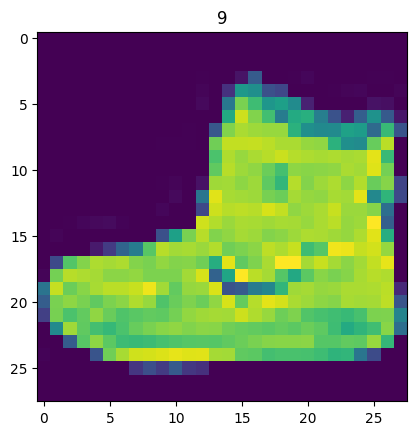

In [ ]:
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

In [ ]:
identificacoes_treino

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
print(f'Valor Mínimo: {identificacoes_treino.min()} \n Valor Máximo: {identificacoes_treino.max()}')

Valor Mínimo: 0 
 Valor Máximo: 9


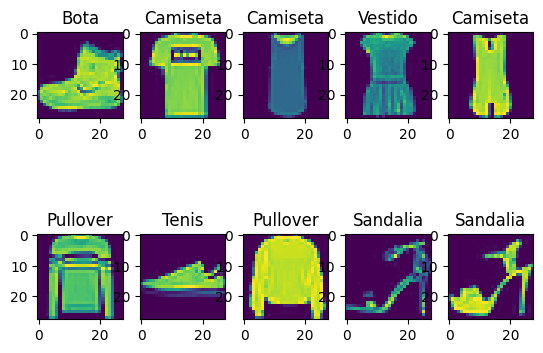

In [ ]:
nome_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido',
                       'Casaco', 'Sandalia', 'Camisa', 'Tenis', 'Bolsa', 'Bota']
for imagem in range(10):
  plt.subplot(2, 5, imagem +1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nome_classificacoes[identificacoes_treino[imagem]])

Nosso modelo tem 3 camadas
* entrada (Camada 0)
* processamento
* Saída
Essas três camadas funcionam em conjunto.

Abaixo é realizado o achatamendo dos tensores (imagens de 28x28) em um vetor unidimensional. O que faz isso é o comando Flatten.

No Deep Learning é necessário compilar antes de fittar. Optimizer e loss muda de acordo com o problema que realizará.

In [ ]:
imagens_treino.shape

(60000, 28, 28)

In [ ]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)])

modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy')
modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 22s 10ms/step - loss: 3.4083


# Melhorando o Modelo
## Camada 1
* Agora queremos **diminuir** as perdas.
Note abaixo que a color varia de 0 a 250. Vamos alterar os dados de treino para pontos fluentes entre 0 e 1 para refazer o modelo

Este processo se chama **normalização**.

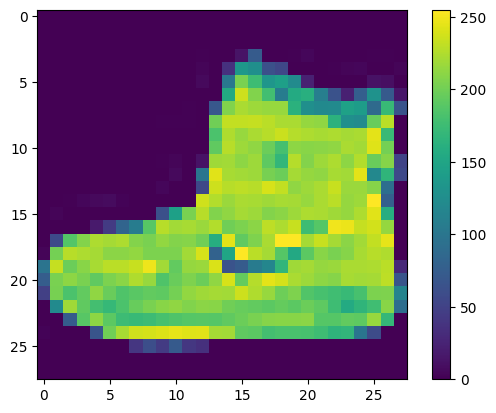

In [ ]:
nome_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido',
                       'Casaco', 'Sandalia', 'Camisa', 'Tenis', 'Bolsa', 'Bota']
"""for imagem in range(10):
  plt.subplot(2, 5, imagem +1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nome_classificacoes[identificacoes_treino[imagem]])"""

plt.imshow(imagens_treino[0])
plt.colorbar()

In [ ]:
imagens_treino = imagens_treino/255.0
#identificacoes_treino = identificacoes_treino/255.0
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)])

modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy')
modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 17s 9ms/step - loss: 0.4797


O modelo diminuir a perda em 10vezes ( 4,79 -> 0.48 )
## Camada 2

Vamos criar mais uma camada para alterar as interações entre camadas, fazendo um funil "contínuo"

In [ ]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
     keras.layers.Dense(128, activation = tensorflow.nn.relu),
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)])

modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy')
modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 13s 6ms/step - loss: 0.4729


In [ ]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    keras.layers.Dense(128, activation = tensorflow.nn.relu),
    keras.layers.Dense(64, activation = tensorflow.nn.relu),
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)])

modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy')
modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 13s 7ms/step - loss: 0.4838


* Infelizmente adicionar camadas não está retornando melhorias significativas, e aumenta o tempo de processamento. Melhor não adicionar camadas novas

* Podemos aumentar a quantidade de treinos atribuindo parâmetro epochs maior que 1. E para adicionar uma métrica adicionamos metrics no compile.

In [ ]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
     keras.layers.Dense(128, activation = tensorflow.nn.relu),
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)])

modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy')
modelo.fit(imagens_treino, identificacoes_treino, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4727
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3569
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3218
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2998
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2824


In [ ]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
     keras.layers.Dense(128, activation = tensorflow.nn.relu),
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)])

modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])
modelo.fit(imagens_treino, identificacoes_treino, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.4727 - accuracy: 0.8293
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3573 - accuracy: 0.8677
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3222 - accuracy: 0.8806
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2995 - accuracy: 0.8889
Epoch 5/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2805 - accuracy: 0.8952


# Testando o modelo

In [ ]:
testes = modelo.predict(imagens_teste)

313/313 [==============================] - 1s 4ms/step


In [ ]:
testes[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.99999994],
      dtype=float32)

In [ ]:
print('Resultados testes:', np.argmax(testes[0]))
print('Numero da imagem teste:', identificacoes_teste[0])

Resultados testes: 9
Numero da imagem teste: 9


In [ ]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print(f'Perda do Teste: {perda_teste} \n Acurácia: {acuracia_teste}')

313/313 [==============================] - 1s 3ms/step - loss: 48.3038 - accuracy: 0.8632
Perda do Teste: 48.30384826660156 
 Acurácia: 0.8632000088691711


In [ ]:
print(f'Perda do Teste: {perda_teste} \n Acurácia: {acuracia_teste}')

Perda do Teste: 48.30384826660156 
 Acurácia: 0.8632000088691711


# Validação

É preciso explicar no fit que quer validação.

In [ ]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
     keras.layers.Dense(128, activation = tensorflow.nn.relu),
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)])

modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 14s 9ms/step - loss: 2.6085 - accuracy: 0.7520 - val_loss: 0.6078 - val_accuracy: 0.8075
Epoch 2/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.5618 - accuracy: 0.8130 - val_loss: 0.5296 - val_accuracy: 0.8141
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5047 - accuracy: 0.8261 - val_loss: 0.4889 - val_accuracy: 0.8360
Epoch 4/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4668 - accuracy: 0.8368 - val_loss: 0.4719 - val_accuracy: 0.8330
Epoch 5/5
1500/1500 [==============================] - 8s 6ms/step - loss: 0.4295 - accuracy: 0.8488 - val_loss: 0.4115 - val_accuracy: 0.8574


In [ ]:
historico.history

{'loss': [2.6084837913513184,
  0.5617650747299194,
  0.5046615600585938,
  0.4668198227882385,
  0.4294571876525879],
 'accuracy': [0.7520416378974915,
  0.8130416870117188,
  0.8261250257492065,
  0.8367708325386047,
  0.8488333225250244],
 'val_loss': [0.60780930519104,
  0.5295676589012146,
  0.48886486887931824,
  0.47189339995384216,
  0.41148999333381653],
 'val_accuracy': [0.8075000047683716,
  0.8140833377838135,
  0.8360000252723694,
  0.8330000042915344,
  0.8574166893959045]}

In [ ]:
historico.history['accuracy']

[0.7520416378974915,
 0.8130416870117188,
 0.8261250257492065,
 0.8367708325386047,
 0.8488333225250244]

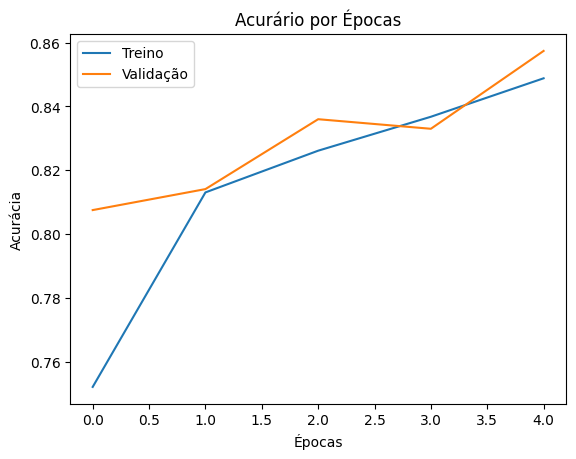

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurário por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

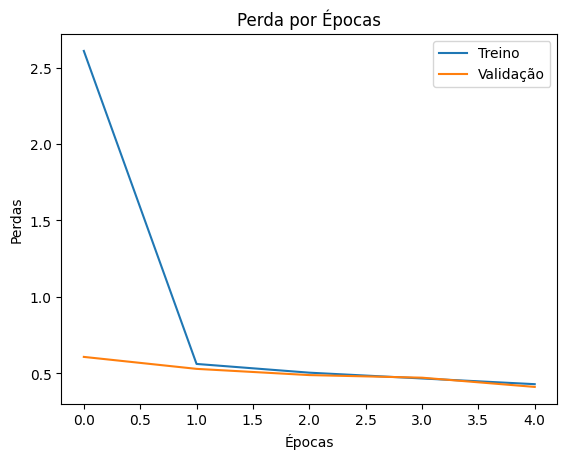

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Perdas')
plt.legend(['Treino', 'Validação'])

* Tomar sempre cuidado com a quantidade de treinamento: Treinar pouco causa Underfitting, enquanto treinar demais causa overfitting.

* Uma tática de melhorar o problemas de under e over fitting é utilizar dropout para "adormecer" alguns neurônios.

In [ ]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
     keras.layers.Dense(128, activation = tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)])

modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 11s 6ms/step - loss: 2.1347 - accuracy: 0.5938 - val_loss: 0.8662 - val_accuracy: 0.6832
Epoch 2/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.8792 - accuracy: 0.6651 - val_loss: 0.7295 - val_accuracy: 0.7335
Epoch 3/5
1500/1500 [==============================] - 10s 6ms/step - loss: 0.8045 - accuracy: 0.6923 - val_loss: 0.6486 - val_accuracy: 0.7666
Epoch 4/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.7422 - accuracy: 0.7170 - val_loss: 0.7281 - val_accuracy: 0.6893
Epoch 5/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.6973 - accuracy: 0.7343 - val_loss: 0.5360 - val_accuracy: 0.8228


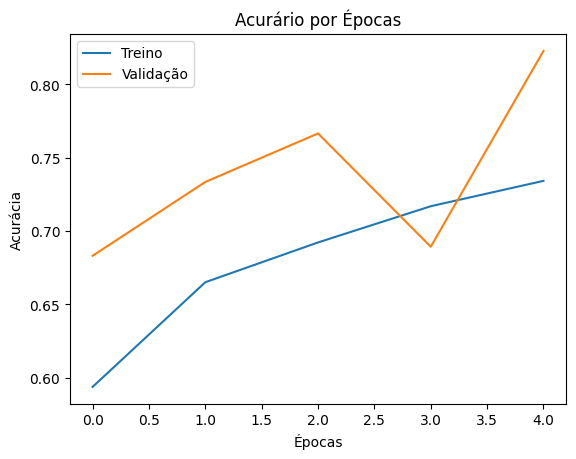

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurário por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

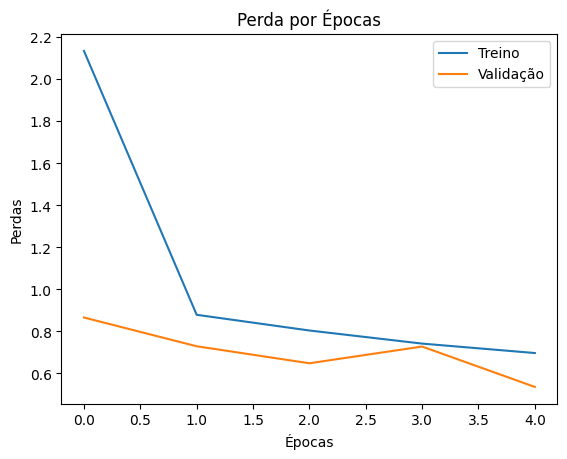

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Perdas')
plt.legend(['Treino', 'Validação'])

# Salvar modelo

In [3]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
     keras.layers.Dense(128, activation = tensorflow.nn.relu),
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)])

modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 5, validation_split = 0.2)
modelo.save('Modelo.h5')

Epoch 1/5
1500/1500 [==============================] - 18s 10ms/step - loss: 2.5329 - accuracy: 0.7575 - val_loss: 0.6589 - val_accuracy: 0.7917
Epoch 2/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5687 - accuracy: 0.8124 - val_loss: 0.5704 - val_accuracy: 0.8093
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4988 - accuracy: 0.8272 - val_loss: 0.5189 - val_accuracy: 0.8192
Epoch 4/5
1500/1500 [==============================] - 8s 6ms/step - loss: 0.4504 - accuracy: 0.8392 - val_loss: 0.4547 - val_accuracy: 0.8475
Epoch 5/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4148 - accuracy: 0.8518 - val_loss: 0.4479 - val_accuracy: 0.8435


In [ ]:
from tensorflow.keras.models  import load_model
modelo_salvo = load_model('Modelo.h5')

In [ ]:
tst_salvo = modelo_salvo.predict(imagens_teste)
print('Resultado do Modelo salvo:', np.argmax(tst_salvo[1]))
print('Resultado Correto :', identificacoes_teste[1])

313/313 [==============================] - 1s 2ms/step
Resultado do Modelo salvo: 2
Resultado Correto : 2


# Aprofundando Teoria

In [4]:
#Resumo do modelo
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


A posição 0 dos pesos são os valores de pesos.
A posição 1 dos pesos são os valores de vieses

In [5]:
pesos = modelo.layers[1].get_weights()[0]
pesos

array([[ 0.03073783,  0.02641059, -0.0116661 , ..., -0.02920938,
         0.03669664, -0.04526698],
       [ 0.05707151,  0.01255032,  0.00954979, ..., -0.01972467,
         0.03965971, -0.05277884],
       [ 0.03360443, -0.03312306,  0.06638271, ..., -0.02275405,
         0.04311883,  0.00681431],
       ...,
       [-0.03264478, -0.05983222, -0.01861903, ..., -0.03224876,
         0.02305841,  0.0360494 ],
       [-0.00958586,  0.06747416, -0.08451868, ..., -0.01144274,
         0.01170393,  0.06338386],
       [-0.00226963, -0.05163019, -0.07579395, ...,  0.01998337,
        -0.02240027,  0.0459738 ]], dtype=float32)

In [6]:
vieses = modelo.layers[1].get_weights()[1]
vieses

array([-7.41331792e-03, -2.53576934e-02, -2.05791239e-02, -1.32208029e-02,
       -6.46498462e-04, -1.31054055e-02, -1.83459911e-02,  1.92836542e-02,
       -6.04754267e-03,  7.74992583e-03,  4.38934453e-02, -1.20884404e-02,
       -1.36361932e-02, -1.44719332e-02, -1.64460871e-04,  9.43653435e-02,
        1.07557043e-01, -1.17668193e-02, -2.05246452e-02, -1.79521255e-02,
       -4.77143191e-03, -1.16607830e-01, -6.59793848e-03, -3.17373034e-03,
       -1.26745868e-02, -2.38329656e-02, -2.43376903e-02, -1.31592648e-02,
       -4.35809977e-03, -1.12977372e-02, -7.01103806e-02,  1.00954864e-02,
       -2.96145421e-03, -1.45159230e-01, -1.19776344e-02,  5.86521886e-02,
        4.11207974e-02,  2.15352662e-02, -5.23401797e-03,  7.48383701e-02,
        1.25753758e-02,  2.33251834e-04, -1.81551534e-03,  2.89043761e-03,
       -2.72528664e-03, -9.60209370e-02, -2.52354182e-02, -5.18146995e-03,
       -1.69770811e-02, -7.87662063e-03, -1.58357974e-02,  9.25505906e-02,
       -2.08337344e-02, -

## Estudando Pesos
### Pesos Zeros para Inicializar

In [7]:
pesos.shape
pesos_dense_zeros =  np.zeros(pesos.shape)
modelo.layers[1].set_weights([pesos_dense_zeros, vieses])
modelo.layers[1].get_weights()[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 9s 5ms/step - loss: 0.5854 - accuracy: 0.7943 - val_loss: 0.4754 - val_accuracy: 0.8226
Epoch 2/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.4559 - accuracy: 0.8338 - val_loss: 0.4408 - val_accuracy: 0.8382
Epoch 3/5
1500/1500 [==============================] - 17s 11ms/step - loss: 0.4227 - accuracy: 0.8467 - val_loss: 0.4397 - val_accuracy: 0.8430
Epoch 4/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.4039 - accuracy: 0.8540 - val_loss: 0.4164 - val_accuracy: 0.8553
Epoch 5/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3995 - accuracy: 0.8575 - val_loss: 0.4445 - val_accuracy: 0.8451


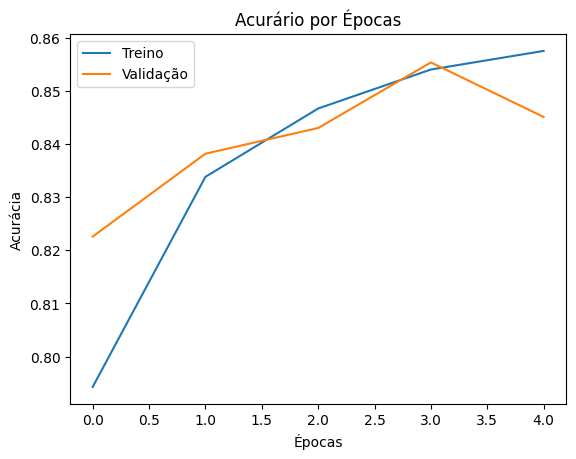

In [9]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurário por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

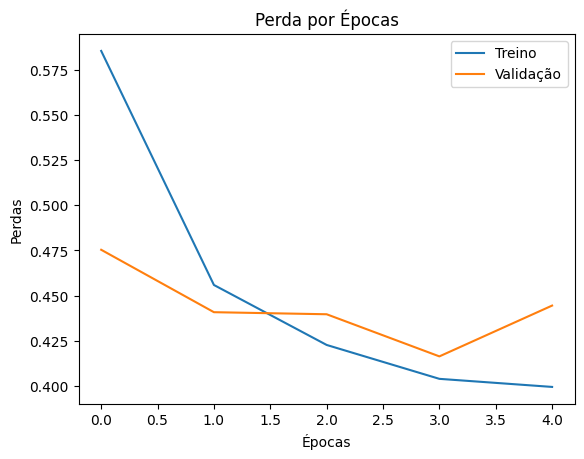

In [10]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Perdas')
plt.legend(['Treino', 'Validação'])

In [11]:
pesos.shape


(784, 256)

### Pesos Aleatórios para Inicializar

Epoch 1/5
1500/1500 [==============================] - 10s 6ms/step - loss: 272.1004 - accuracy: 0.1033 - val_loss: 2.3153 - val_accuracy: 0.0995
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 2.3058 - accuracy: 0.0999 - val_loss: 2.3031 - val_accuracy: 0.0957
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3028 - val_accuracy: 0.0957
Epoch 4/5
1500/1500 [==============================] - 13s 9ms/step - loss: 2.3028 - accuracy: 0.1002 - val_loss: 2.3028 - val_accuracy: 0.0983
Epoch 5/5
1500/1500 [==============================] - 10s 7ms/step - loss: 2.3028 - accuracy: 0.0983 - val_loss: 2.3028 - val_accuracy: 0.1003


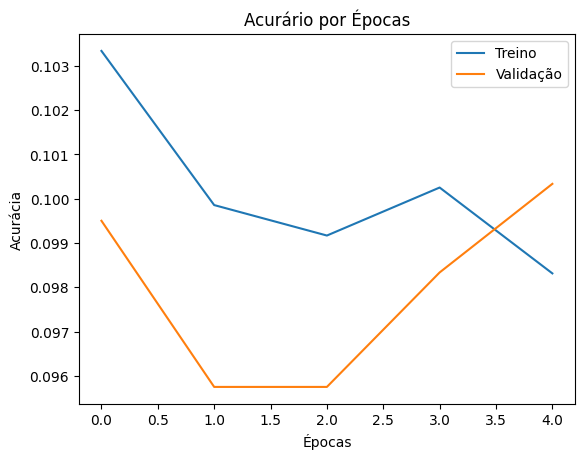

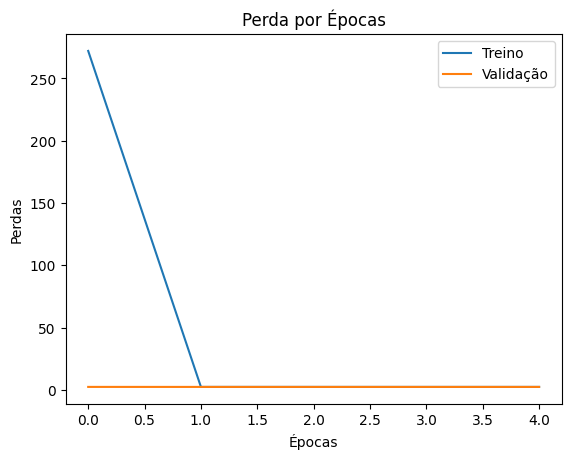

In [12]:
pesos_dense_aleatorios =  np.random.rand(784,256)
modelo.layers[1].set_weights([pesos_dense_aleatorios, vieses])
modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 5, validation_split = 0.2)

plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurário por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])
plt.show()

plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Perdas')
plt.legend(['Treino', 'Validação'])
plt.show()

Os pesos são os multiplicadores que determinam a importância de uma conexão, são como os pesos de Bolztman dizendo quão provável é uma conexão ocorrer.



1.   Zerar os pesos faz com que exista uma simetria entre todas as possibilidades, e por isso não há diferença entre conexão. O importante é haver quebra de simetria.
2.   Fazer valores aleatórios faz com que a fowardpropagations e backpropragrations diminuia os pessoas com o tempo.

No config (abaixo) é visto que o inicializador é "GlorotUniform", este também chamado de algoritmo de Xavier, utiliza de médias para fazer com os pesos não sejam nem muito pequenos nem muito altos



In [ ]:
modelo.get_config()

## Estudando Vieses
### Vieses Zerados


In [14]:
vieses.shape

(256,)

In [15]:
vieses_zerados = np.zeros(vieses.shape)

In [16]:
modelo.layers[1].set_weights([pesos_dense_zeros, vieses_zerados])

Epoch 1/5
1500/1500 [==============================] - 9s 5ms/step - loss: 2.3034 - accuracy: 0.0986 - val_loss: 2.3028 - val_accuracy: 0.1013
Epoch 2/5
1500/1500 [==============================] - 10s 6ms/step - loss: 2.3030 - accuracy: 0.1003 - val_loss: 2.3030 - val_accuracy: 0.0983
Epoch 3/5
1500/1500 [==============================] - 10s 7ms/step - loss: 2.3031 - accuracy: 0.0999 - val_loss: 2.3026 - val_accuracy: 0.1003
Epoch 4/5
1500/1500 [==============================] - 8s 6ms/step - loss: 2.3030 - accuracy: 0.0988 - val_loss: 2.3031 - val_accuracy: 0.0983
Epoch 5/5
1500/1500 [==============================] - 8s 6ms/step - loss: 2.3030 - accuracy: 0.1014 - val_loss: 2.3033 - val_accuracy: 0.0983


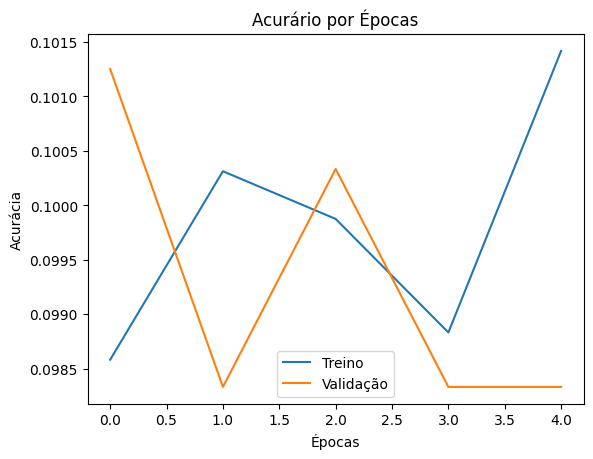

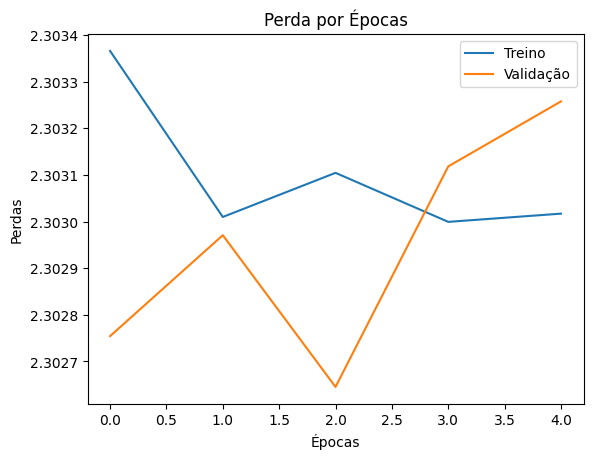

In [17]:
modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 5, validation_split = 0.2)

plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurário por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])
plt.show()

plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Perdas')
plt.legend(['Treino', 'Validação'])
plt.show()

### Pesos aleatorios com vieses zerados

Epoch 1/5
1500/1500 [==============================] - 10s 6ms/step - loss: 2.3035 - accuracy: 0.1000 - val_loss: 2.3028 - val_accuracy: 0.0995
Epoch 2/5
1500/1500 [==============================] - 8s 5ms/step - loss: 2.3028 - accuracy: 0.0997 - val_loss: 2.3026 - val_accuracy: 0.0995
Epoch 3/5
1500/1500 [==============================] - 10s 6ms/step - loss: 2.3028 - accuracy: 0.0996 - val_loss: 2.3028 - val_accuracy: 0.0995
Epoch 4/5
1500/1500 [==============================] - 8s 6ms/step - loss: 2.3028 - accuracy: 0.0982 - val_loss: 2.3027 - val_accuracy: 0.1005
Epoch 5/5
1500/1500 [==============================] - 8s 5ms/step - loss: 2.3028 - accuracy: 0.1003 - val_loss: 2.3027 - val_accuracy: 0.0983


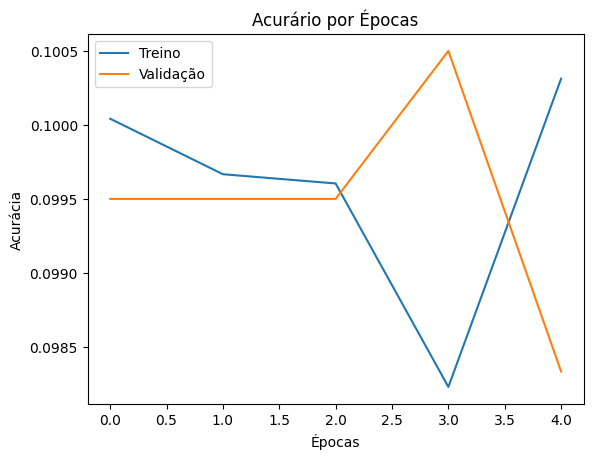

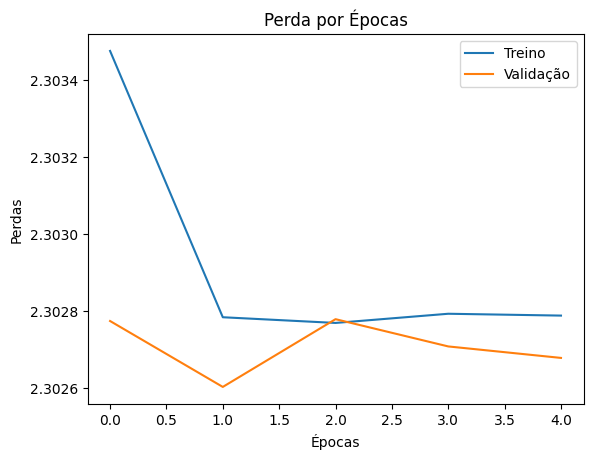

In [18]:
pesos_dense_aleatorios =  np.random.rand(784,256)
modelo.layers[1].set_weights([pesos_dense_aleatorios, vieses_zerados])
modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 5, validation_split = 0.2)

plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurário por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])
plt.show()

plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Perdas')
plt.legend(['Treino', 'Validação'])
plt.show()

* Os pesos influenciam muitos mais as redes do que os vieses.
* Os vieses podem tanto inicializar zero quanto valores pequenos. Prefira valores pequenos.

In [19]:
modelo.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_input'}},
  {'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 1

# Discutindo Otimizador:

A função do otimizador é encontrar o ponto com menor perda. Faço uma analogia com física: O ponto de menor perda seria o mínimo de energia. Nesta discussão um dos otimizadores que existem é o gradiente descendente que utiliza a busca por mínimo por método de gradiente.

O gradiente descendente estocástico é um gradiente que utiliza processos aleatórios para encontrar o mínimo global.

[Site dos Otimizadores do Keras](https://keras.io/api/optimizers/)

* É possível alterar configurações do otimizador para melhorar a convergênio do valor do mínimo global.

In [24]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
     keras.layers.Dense(128, activation = tensorflow.nn.relu),
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)])

adam = keras.optimizers.Adam(learning_rate=0.005)

modelo.compile(optimizer = adam,
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 9s 6ms/step - loss: 4.5406 - accuracy: 0.7494 - val_loss: 0.5905 - val_accuracy: 0.7846
Epoch 2/5
1500/1500 [==============================] - 10s 6ms/step - loss: 0.5479 - accuracy: 0.8098 - val_loss: 0.5311 - val_accuracy: 0.8192
Epoch 3/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5754 - accuracy: 0.8008 - val_loss: 0.6839 - val_accuracy: 0.7713
Epoch 4/5
1500/1500 [==============================] - 8s 6ms/step - loss: 0.6721 - accuracy: 0.7710 - val_loss: 0.6201 - val_accuracy: 0.7773
Epoch 5/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.8764 - accuracy: 0.6869 - val_loss: 0.6652 - val_accuracy: 0.7814


In [25]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
     keras.layers.Dense(128, activation = tensorflow.nn.relu),
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)])

adam = keras.optimizers.Adam(learning_rate=0.0005)

modelo.compile(optimizer = adam,
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 10s 6ms/step - loss: 3.3672 - accuracy: 0.7509 - val_loss: 0.9435 - val_accuracy: 0.7616
Epoch 2/5
1500/1500 [==============================] - 10s 6ms/step - loss: 0.6220 - accuracy: 0.8124 - val_loss: 0.6118 - val_accuracy: 0.8044
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4783 - accuracy: 0.8372 - val_loss: 0.4631 - val_accuracy: 0.8438
Epoch 4/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4341 - accuracy: 0.8471 - val_loss: 0.4352 - val_accuracy: 0.8530
Epoch 5/5
1500/1500 [==============================] - 10s 6ms/step - loss: 0.4055 - accuracy: 0.8556 - val_loss: 0.4629 - val_accuracy: 0.8393


## Vamos continuar explorando outros Hiperparâmetros
Batch_Size muda quantos imagens são dadas para o treino

In [33]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
     keras.layers.Dense(128, activation = tensorflow.nn.relu),
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)])

adam = keras.optimizers.Adam(learning_rate=0.0005)

modelo.compile(optimizer = adam,
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino,
                       batch_size = 480,
                       epochs = 5, validation_split = 0.2)

Epoch 1/5
100/100 [==============================] - 5s 24ms/step - loss: 10.2504 - accuracy: 0.7046 - val_loss: 3.7696 - val_accuracy: 0.7711
Epoch 2/5
100/100 [==============================] - 2s 18ms/step - loss: 2.8125 - accuracy: 0.7896 - val_loss: 2.3931 - val_accuracy: 0.7957
Epoch 3/5
100/100 [==============================] - 2s 17ms/step - loss: 2.0072 - accuracy: 0.8093 - val_loss: 1.9472 - val_accuracy: 0.8093
Epoch 4/5
100/100 [==============================] - 2s 18ms/step - loss: 1.5500 - accuracy: 0.8227 - val_loss: 1.5707 - val_accuracy: 0.8281
Epoch 5/5
100/100 [==============================] - 2s 17ms/step - loss: 1.2447 - accuracy: 0.8370 - val_loss: 1.4883 - val_accuracy: 0.8193


Posso também fazer um callback que mostra se o modelo alcançou um mínimo local. E fazer um cheackpoint para salvar o modelo baseado em algum parâmetro.

In [38]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
     keras.layers.Dense(128, activation = tensorflow.nn.relu),
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)])

adam = keras.optimizers.Adam(learning_rate=0.0005)

callbacks = [keras.callbacks.EarlyStopping(monitor = 'val_loss'),
             keras.callbacks.ModelCheckpoint(filepath = 'Melhor_modelo.hdf5', monitor = 'val_loss', save_best_only = True)]

modelo.compile(optimizer = adam,
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino,
                       batch_size = 220,
                       epochs = 5, validation_split = 0.2,
                       callbacks = callbacks)

Epoch 1/5
219/219 [==============================] - 5s 17ms/step - loss: 7.6427 - accuracy: 0.7396 - val_loss: 3.0900 - val_accuracy: 0.7745
Epoch 2/5
219/219 [==============================] - 3s 13ms/step - loss: 2.1893 - accuracy: 0.7999 - val_loss: 2.0047 - val_accuracy: 0.7843
Epoch 3/5
219/219 [==============================] - 4s 19ms/step - loss: 1.3575 - accuracy: 0.8177 - val_loss: 1.4248 - val_accuracy: 0.7987
Epoch 4/5
219/219 [==============================] - 5s 21ms/step - loss: 0.9439 - accuracy: 0.8318 - val_loss: 1.1933 - val_accuracy: 0.7987
Epoch 5/5
219/219 [==============================] - 4s 17ms/step - loss: 0.7365 - accuracy: 0.8403 - val_loss: 0.9657 - val_accuracy: 0.8192
